In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import numpy as np

In [30]:
# Load Iris dataset
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Dataset loaded successfully!")
except Exception as e:
    print("Error loading dataset:", e)

Dataset loaded successfully!


In [31]:
# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
# Explore the structure
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [33]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [34]:
# Group by 'target'  and compute mean of numerical columns
grouped = df.groupby('target').mean()
grouped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [35]:
# Map target integers to species names for better readability
species_map = dict(zip(range(3), iris.target_names))
df['species'] = df['target'].map(species_map)

# Group by species name
df.groupby('species').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


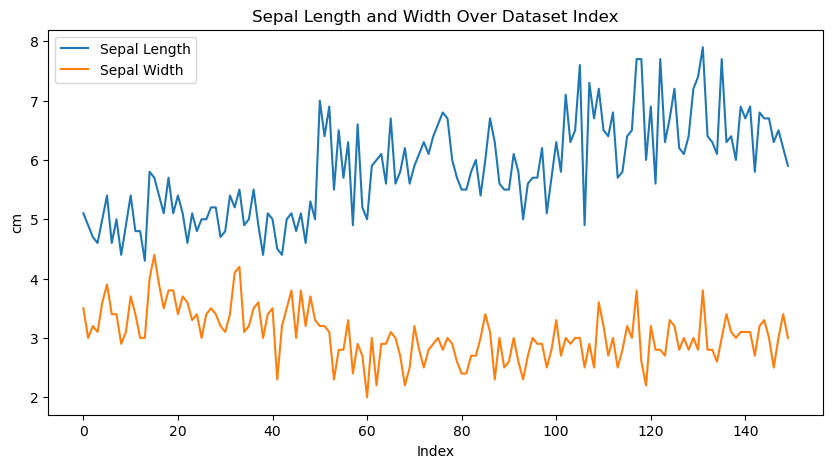

In [18]:
# Plot sepal length and sepal width over the dataset index
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sepal length (cm)'], label='Sepal Length')
plt.plot(df.index, df['sepal width (cm)'], label='Sepal Width')
plt.title('Sepal Length and Width Over Dataset Index')
plt.xlabel('Index')
plt.ylabel('cm')
plt.legend()
plt.show()

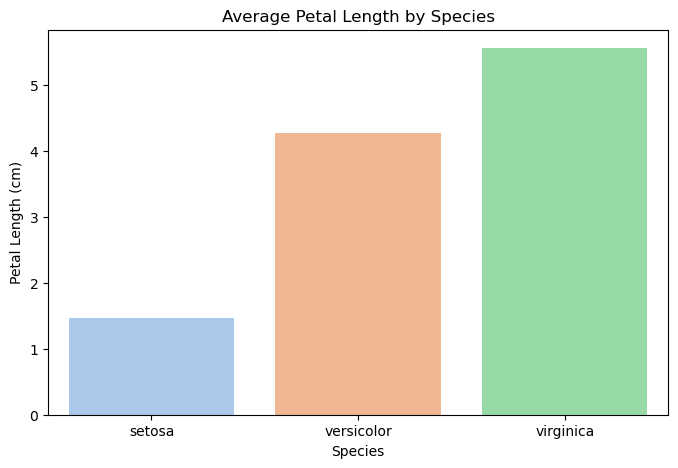

In [20]:
# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='species', y='petal length (cm)', data=df, errorbar=None, palette='pastel')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

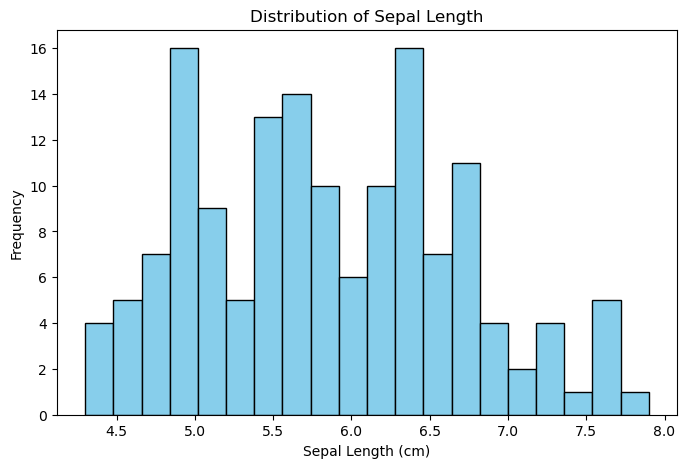

In [21]:
# Histogram
plt.figure(figsize=(8,5))
plt.hist(df['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

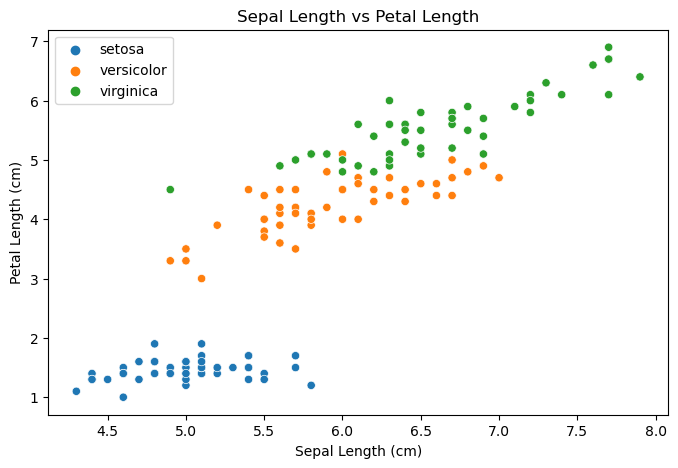

In [25]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()